<a href="https://colab.research.google.com/github/JacksonPlatiny/Estudo-Dirigido-Controle-e-Automacao/blob/main/Cap%C3%ADtulo%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo dirigido de Controle e Automa√ß√£o I
### Livro: Sistemas de Controle Modernos, de Richard C. Dorf & Robert H. Bishop.
### Alunos: Jackson Platiny Soares Leite & Gabriel Lopes Rodrigues e Silva.

# Cap√≠tulo 7 - O M√©todo do Lugar das Ra√≠zes:

## 7.1 Introdu√ß√£o

O **M√©todo do Lugar das Ra√≠zes** √© uma t√©cnica gr√°fica usada para analisar a estabilidade e a resposta din√¢mica de sistemas de controle, mostrando como as ra√≠zes da equa√ß√£o caracter√≠stica de um sistema variam conforme o par√¢metro de controle (geralmente o ganho \(K\)) √© alterado. Esse m√©todo √© essencial para o projeto e an√°lise de sistemas de controle.

## 7.2 O Conceito de Lugar das Ra√≠zes

O **lugar das ra√≠zes** √© o trajeto que as ra√≠zes da equa√ß√£o caracter√≠stica de um sistema seguem no plano \( s \) √† medida que o ganho do sistema (\(K\)) varia. A equa√ß√£o caracter√≠stica √© dada por:

$$
1 + K G(s) = 0
$$

Onde \( G(s) \) √© a fun√ß√£o de transfer√™ncia do sistema. As ra√≠zes dessa equa√ß√£o determinam os polos do sistema, e sua posi√ß√£o no plano \( s \) est√° diretamente ligada √† resposta din√¢mica do sistema.

In [ ]:
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

## 7.3 O Procedimento do Lugar das Ra√≠zes

### Passos para o Procedimento:
1. **Identifica√ß√£o dos p√≥los e zeros**: Determine os p√≥los e zeros do sistema.
2. **Constru√ß√£o do Lugar das Ra√≠zes**:
   - Tra√ßar as linhas de loci a partir dos p√≥los e zeros.
   - Determinar os √¢ngulos de entrada e sa√≠da dos loci.
   - Verificar as interse√ß√µes com o eixo real e outras caracter√≠sticas importantes.
3. **Ajuste do Ganho**: O valor do ganho \(K\) √© ajustado para ver a movimenta√ß√£o das ra√≠zes.

### F√≥rmulas Importantes:
- Requisitos de **magnitude** e **√¢ngulo** para a posi√ß√£o das ra√≠zes:
  $$
  |G(s)| = 1 \quad \text{e} \quad \angle G(s) = 180^\circ + k360^\circ
  $$

O c√≥digo asseguir implementa o M√©todo do Lugar das Ra√≠zes para um sistema de controle de malha √∫nica com retroa√ß√£o.

$$
1 + GH(s) = 1 + \frac{K \left( \frac{1}{2}s + 1 \right)}{s \left( \frac{1}{4}s + 1 \right)} = 0
$$

O numerador e o denominador da fun√ß√£o de transfer√™ncia s√£o extra√≠dos:

- **Numerador**:  
  $$
  (1/2)s + 1
  $$

- **Denominador**:  
  $$
  s \left( \frac{1}{4}s + 1 \right) = \frac{1}{41}{0.25s^2 + s}
$$


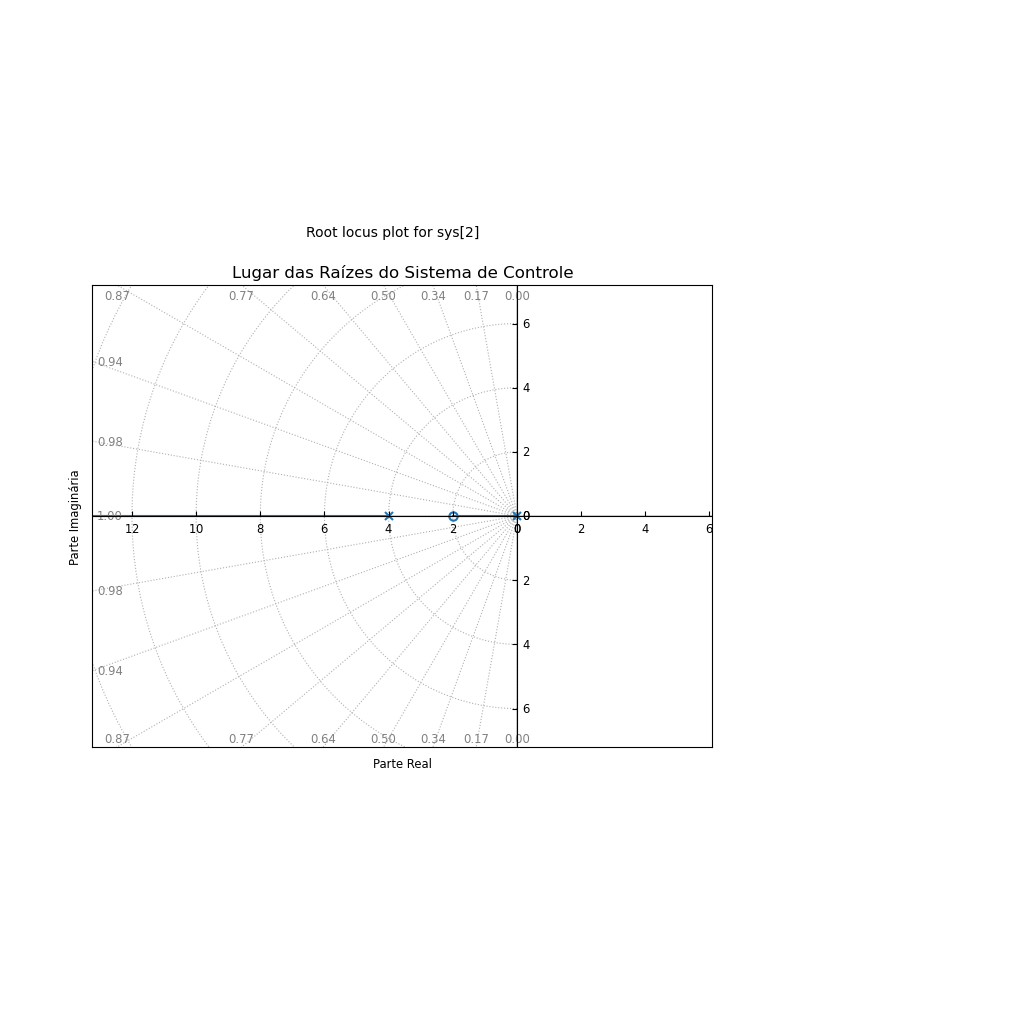

In [ ]:
# Defini√ß√£o do numerador e denominador da fun√ß√£o de transfer√™ncia G(s)H(s)
num = [0.5, 1]  # (1/2)s + 1
den = [0.25, 1, 0]  # s(1/4s + 1) = (1/4)s¬≤ + s

# Criando a fun√ß√£o de transfer√™ncia GH(s)
GH = ctrl.TransferFunction(num, den)

# Plotando o Lugar das Ra√≠zes
plt.figure(figsize=(8,6))
ctrl.rlocus(GH, grid=True)
plt.title("Lugar das Ra√≠zes do Sistema de Controle")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imagin√°ria")
plt.show()

O gr√°fico do Lugar das Ra√≠zes mostra como os p√≥los do sistema fechado se deslocam no plano \( s \) √† medida que o ganho \( K \) varia. O comportamento das ra√≠zes nos diz se o sistema ser√°:

- **Est√°vel**: Se todas as ra√≠zes estiverem no semiplano esquerdo (parte real negativa).
- **Marginalmente est√°vel**: Se houver ra√≠zes no eixo imagin√°rio.
- **Inst√°vel**: Se houver ra√≠zes no semiplano direito (parte real positia).


## 7.4 Um Exemplo de An√°lise e Projeto de Sistemas de Controle Utilizando o M√©todo do Lugar das Ra√≠zes

### Sistema de Controle de Segunda Ordem:
Considere um sistema de segunda ordem representado pela equa√ß√£o caracter√≠stica:

$$
1 + K \frac{1}{s(s+2)} = 0
$$

O **lugar das ra√≠zes** para esse sistema mostra como as ra√≠zes se movem no plano \( s \) √† medida que \( K \) varia. A localiza√ß√£o das ra√≠zes afeta diretamente a resposta transit√≥ria e a estabilidade do sistema.


### **1. Exemplo**
A an√°lise e o projeto de um sistema de controle podem ser realizados utilizando-se a **Transformada de Laplace**, **diagramas de fluxo de sinal**, o **plano \(s\)** e o **m√©todo do lugar das ra√≠zes**. Neste exemplo, analisaremos um sistema de **balan√ßa com escala autom√°tica** e selecionaremos um ganho \( K \) adequado baseado no m√©todo do **lugar das ra√≠zes**.

### **2. Defini√ß√£o do Sistema**
O sistema √© modelado a partir das seguintes especifica√ß√µes:

- **Momento de in√©rcia da viga**: \( J = 0.05 \) kg¬∑m¬≤
- **Tens√£o da bateria**: \( E = 24V \)
- **Parafuso sem fim**: 20 voltas/cm
- **Potenci√¥metro de posi√ß√£o**: 6 cm de comprimento
- **Potenci√¥metro de entrada \( y \)**: 0.5 cm de comprimento
- **Constante de amortecimento**: \( b = 10\sqrt{3} \) kgf/m/s
- **Comprimento da barra**: 20 cm
- **Ponto de aplica√ß√£o do peso**: 5 cm do piv√¥

### **3. Modelo Matem√°tico**  

A fun√ß√£o de transfer√™ncia do sistema em malha aberta √© dada por:  

$$
G(s)H(s) = \frac{K}{J s^2 + b s}
$$  

Com os valores dados, substitu√≠mos \( J = 0.05 \) e \( b = 10\sqrt{3} \):  

$$
G(s)H(s) = \frac{K}{0.05 s^2 + 10\sqrt{3} s}
$$  


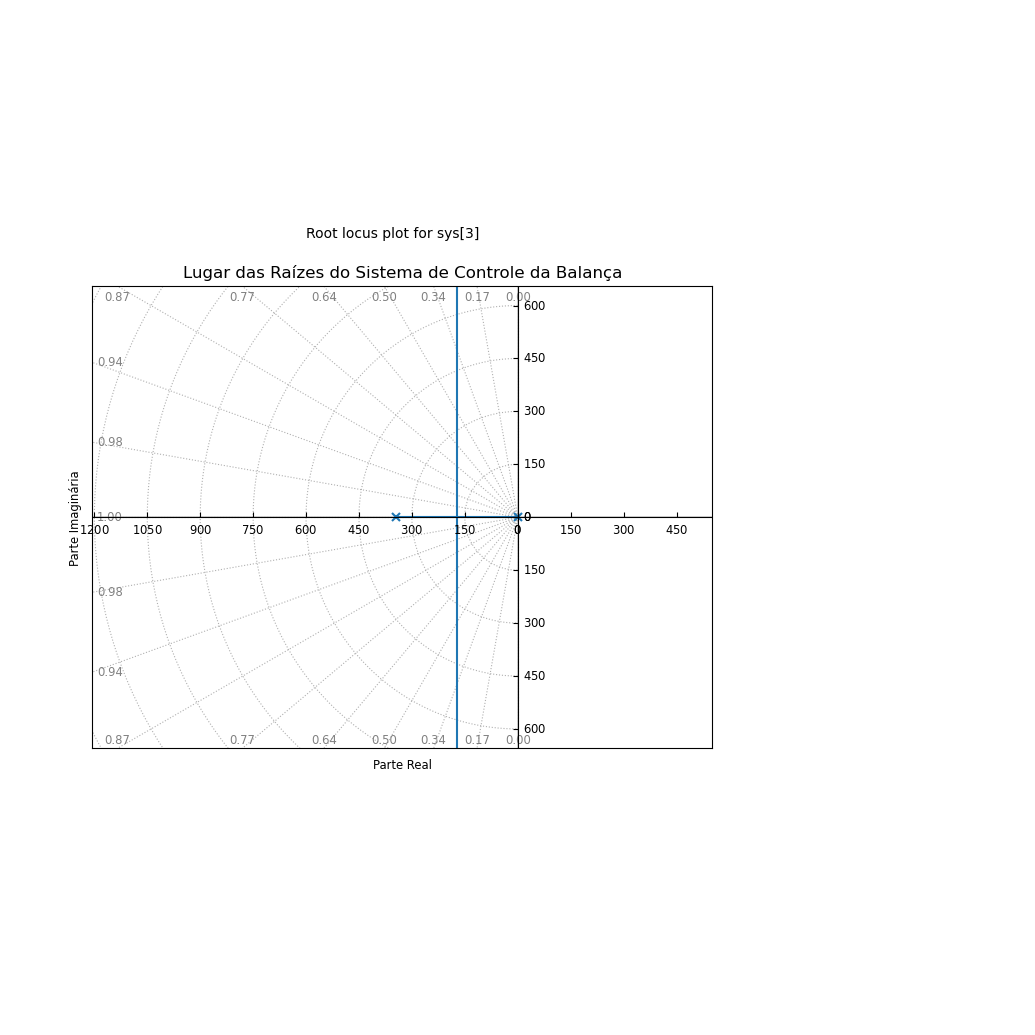

In [ ]:
# Defini√ß√£o dos par√¢metros do sistema
J = 0.05  # Momento de in√©rcia da viga (kg¬∑m¬≤)
b = 10 * np.sqrt(3)  # Constante de amortecimento (kgf/m/s)
K = 1  # Ganho arbitr√°rio para an√°lise inicial

# Numerador e denominador da fun√ß√£o de transfer√™ncia
num = [K]  # Apenas K
den = [J, b, 0]  # 0.05s¬≤ + 10‚àö3 s

# Criando a fun√ß√£o de transfer√™ncia G(s)H(s)
GH = ctrl.TransferFunction(num, den)

# Plotando o Lugar das Ra√≠zes
plt.figure(figsize=(8,6))
ctrl.rlocus(GH, grid=True)
plt.title("Lugar das Ra√≠zes do Sistema de Controle da Balan√ßa")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imagin√°ria")
plt.show()

## 7.5 Projeto de Par√¢metro pelo M√©todo do Lugar das Ra√≠zes

Para projetar o par√¢metro \(K\) utilizando o m√©todo do lugar das ra√≠zes, deve-se garantir que as ra√≠zes do sistema (ou polos) se movam de forma desejada no plano \( s \). Isso √© feito ajustando \(K\) para que as ra√≠zes se posicionem nas localiza√ß√µes desejadas, levando em considera√ß√£o a estabilidade e os requisitos de desempenho.

## 7.6 Sensibilidade e Lugar das Ra√≠zes

A **sensibilidade** de um sistema de controle refere-se √† sua capacidade de responder a varia√ß√µes nas condi√ß√µes externas (como dist√∫rbios ou mudan√ßas nos par√¢metros do sistema). A sensibilidade pode ser analisada atrav√©s do lugar das ra√≠zes, pois a movimenta√ß√£o das ra√≠zes no plano \( s \) indica como o sistema reage a altera√ß√µes nos par√¢metros de controle.

- **Fun√ß√£o de sensibilidade** √© dada por:

$$
S(s) = \frac{1}{1 + K G(s)}
$$

A localiza√ß√£o dos p√≥los de \( S(s) \) influencia diretamente a resposta a dist√∫rbios.

Quando projetamos um par√¢metro ùêæ, nosso objetivo √© ajustar o valor de ùêæ de forma que as ra√≠zes do sistema se movam de acordo com o desejado no plano ùë†, de modo que atendam aos requisitos de estabilidade e desempenho.

Neste exemplo, vamos usar um sistema de segunda ordem representado por uma fun√ß√£o de transfer√™ncia simples, e ajustaremos ùêæ para projetar o comportamento desejado.

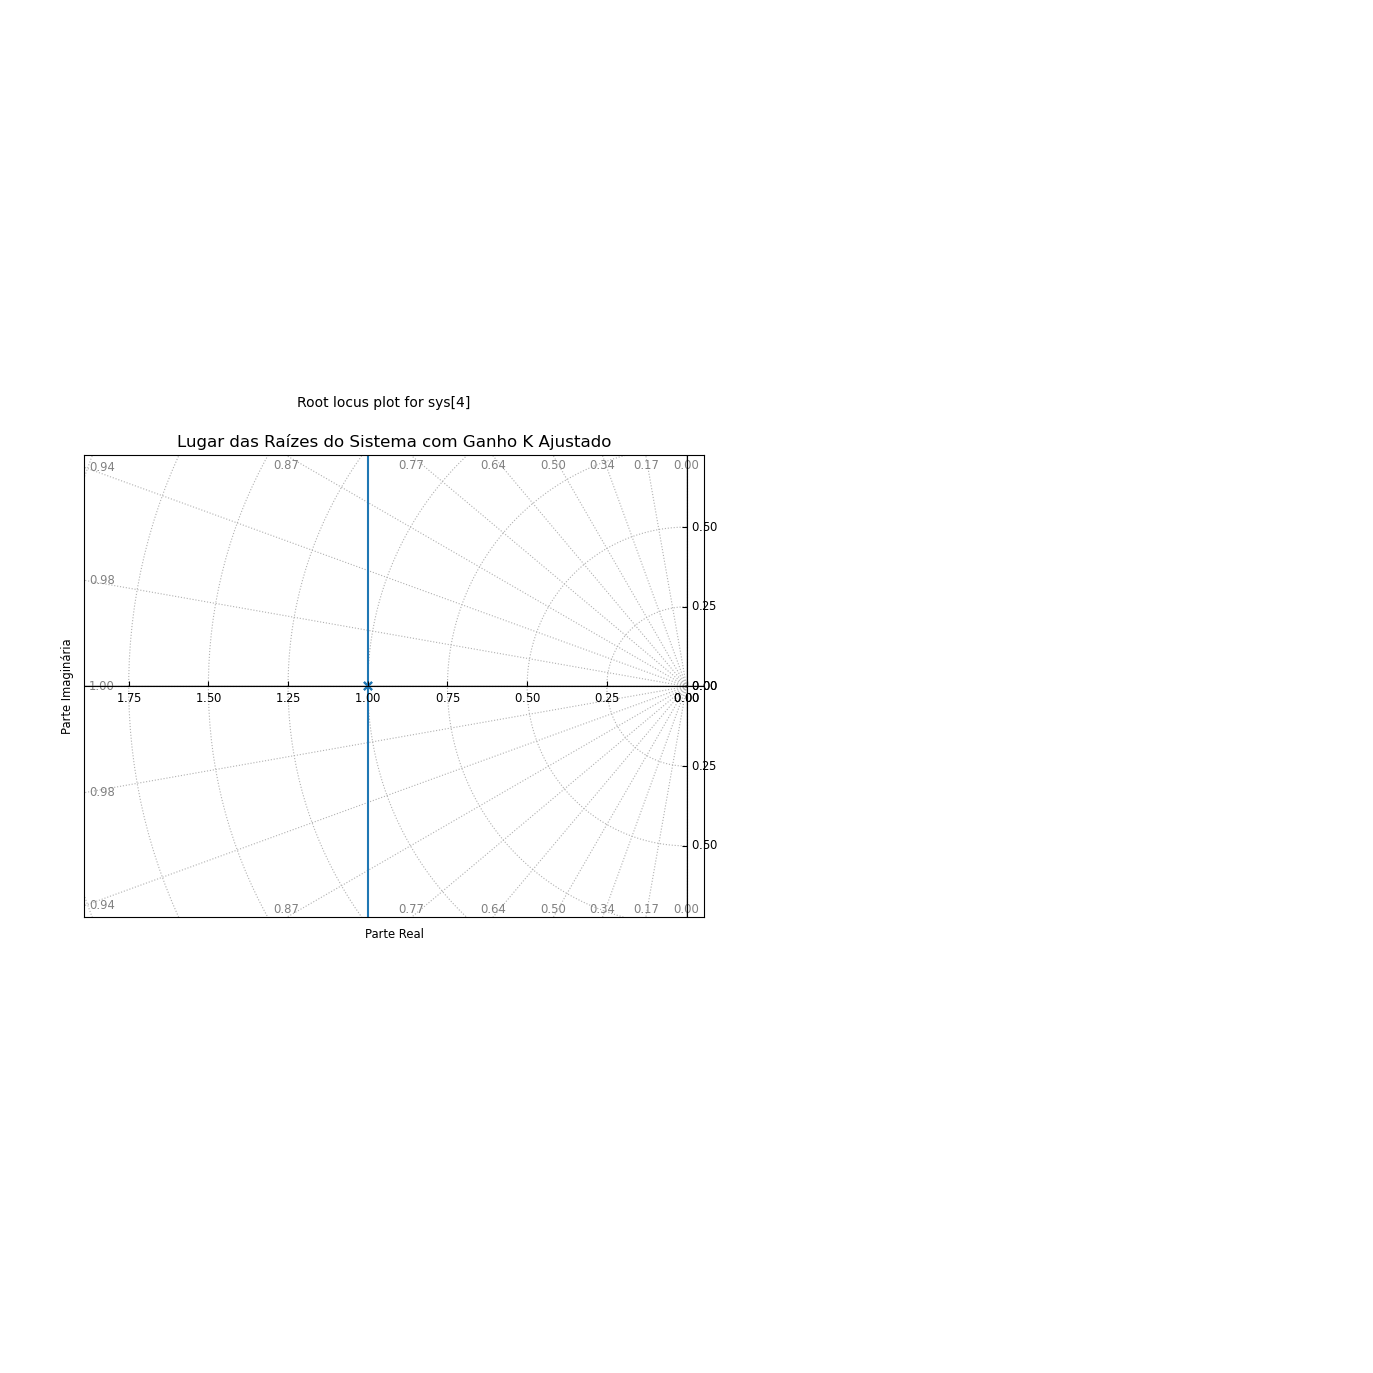

In [ ]:
num = [1]  # K
den = [1, 2, 1]  # s^2 + 2s + 1

# Criando a fun√ß√£o de transfer√™ncia
G_H = ctrl.TransferFunction(num, den)

# Plotando o Lugar das Ra√≠zes para diferentes valores de K
plt.figure(figsize=(8,6))

# Plotando o Lugar das Ra√≠zes com uma grade para facilitar a visualiza√ß√£o
ctrl.rlocus(G_H, grid=True)

plt.title("Lugar das Ra√≠zes do Sistema com Ganho K Ajustado")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imagin√°ria")
plt.show()

## 7.7 Controladores de Tr√™s Termos (PID)

O **controlador PID** √© amplamente utilizado em sistemas de controle. Ele ajusta a sa√≠da do sistema com base em tr√™s componentes: proporcional, integral e derivativo. A fun√ß√£o de transfer√™ncia do PID √© dada por:

$$
C(s) = K_p + \frac{K_i}{s} + K_d s
$$

Onde \(K_p\), \(K_i\), e \(K_d\) s√£o os ganhos proporcional, integral e derivativo, respectivamente.

O **lugar das ra√≠zes** pode ser utilizado para ajustar esses par√¢metros, garantindo que o sistema atenda aos requisitos de estabilidade e desempenho.


## 7.8 Exemplo de Projeto: Sistema de Controle de um Manipulador de Laser

Considere o sistema de controle de um manipulador de laser, que deve ser ajustado para realizar movimentos r√°pidos e precisos. O controlador pode ser projetado utilizando o m√©todo do lugar das ra√≠zes, ajustando o ganho \(K\) e os par√¢metros do controlador PID para garantir que as ra√≠zes se posicionem adequadamente no plano \(s\), atendendo aos requisitos de desempenho, como tempo de subida, sobreleap e estabilidade.

### Passos:
1. **Modelo do Sistema**: Defina o modelo do manipulador de laser em termos de sua fun√ß√£o de transfer√™ncia.
2. **An√°lise do Lugar das Ra√≠zes**: Determine o lugar das ra√≠zes do sistema √† medida que \(K\) √© variado.
3. **Projeto do Controlador**: Ajuste os par√¢metros do controlador PID para garantir que as ra√≠zes se posicionem nas regi√µes desejadas, atendendo √†s especifica√ß√µes de desempenho.

### **Simula√ß√£o da Resposta a uma Rampa**

Neste exemplo, vamos simular a resposta do sistema a uma entrada em rampa, levando em considera√ß√£o o ganho \( K = 10 \) para garantir que o erro estacion√°rio seja pequeno. O sistema √© representado pela fun√ß√£o de transfer√™ncia:

$$
G(s)H(s) = \frac{K}{s^3 + 15s^2 + 50s + 50K}
$$

Vamos simular a resposta a uma entrada em rampa e analisar a ultrapassagem e o tempo de assentamento do sistema.


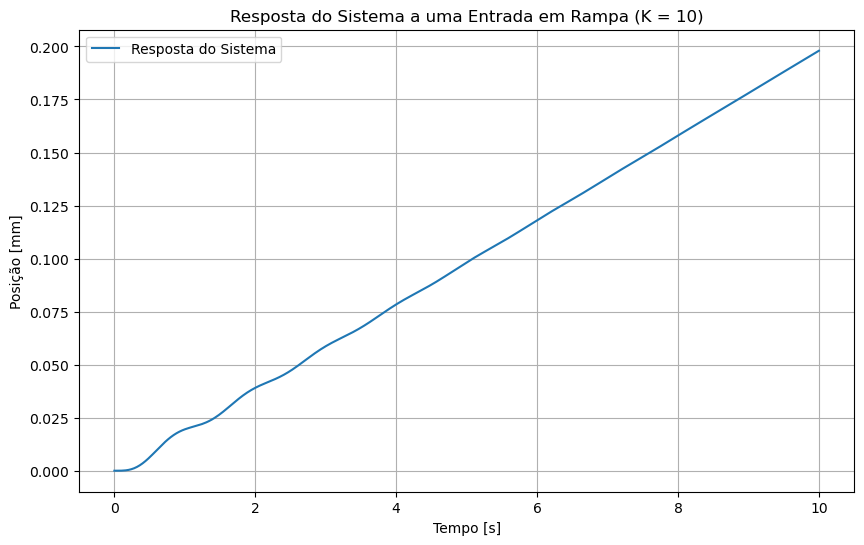

In [ ]:
# Definindo os par√¢metros do sistema
K = 10  # Ganho
num = [K]  # Numerador da fun√ß√£o de transfer√™ncia
den = [1, 15, 50, 50*K]  # Denominador da fun√ß√£o de transfer√™ncia (com K = 10)

# Criando a fun√ß√£o de transfer√™ncia do sistema
system = ctrl.TransferFunction(num, den)

# Definindo a entrada em rampa: r(t) = A * t (com A = 1 mm/s)
A = 1  # Amplitude da entrada em rampa
time = np.linspace(0, 10, 500)  # Tempo de simula√ß√£o
rampa = A * time  # Entrada em rampa: r(t) = A * t

# Resposta do sistema a uma entrada em rampa
time, response = ctrl.forced_response(system, time, rampa)

# Plotando a resposta
plt.figure(figsize=(10,6))
plt.plot(time, response, label='Resposta do Sistema')
plt.title('Resposta do Sistema a uma Entrada em Rampa (K = 10)')
plt.xlabel('Tempo [s]')
plt.ylabel('Posi√ß√£o [mm]')
plt.grid(True)
plt.legend()
plt.show()

---

## Conclus√£o

O m√©todo do **lugar das ra√≠zes** √© uma t√©cnica gr√°fica usada para analisar e projetar sistemas de controle realimentados. Ele permite visualizar como as ra√≠zes da equa√ß√£o caracter√≠stica do sistema se deslocam no plano \( s \) √† medida que um par√¢metro do sistema, geralmente o ganho \( K \), √© variado.  
Esse m√©todo √© √∫til porque permite ajustar o desempenho do sistema de forma intuitiva, garantindo estabilidade e resposta adequada. Al√©m da constru√ß√£o manual do diagrama, o cap√≠tulo aborda o uso de computadores para gerar gr√°ficos do lugar das ra√≠zes, destacando sua efic√°cia no projeto de controladores.  
Um exemplo importante discutido no cap√≠tulo √© o **controlador PID**, que possui tr√™s par√¢metros ajust√°veis e pode ser projetado utilizando o lugar das ra√≠zes. Al√©m disso, o conceito de **sensibilidade das ra√≠zes** a pequenas varia√ß√µes dos par√¢metros √© introduzido, permitindo uma an√°lise mais precisa do comportamento do sistema.  
O m√©todo do lugar das ra√≠zes foi originalmente proposto por Evans em 1948 e, desde ent√£o, tem sido amplamente utilizado na engenharia de controle. Ele pode ser aplicado em sistemas com m√∫ltiplas malhas e pode ser combinado com o **crit√©rio de Routh-Hurwitz** para avaliar a estabilidade do sistema.  
Por fim, o cap√≠tulo destaca que, se a localiza√ß√£o das ra√≠zes n√£o for satisfat√≥ria, ajustes podem ser feitos diretamente a partir do diagrama do lugar das ra√≠zes, tornando o m√©todo uma ferramenta poderosa para o projeto de sistemas de controle.  